## NECESSARY IMPORTS

In [166]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import googlefinance as gf
%matplotlib inline


## READING IN AND CLEANING THE PORTFOLIO

In [167]:
#Defining the paths to data
whale_returns_csv = Path("whale_returns.csv")
algo_returns_csv = Path("algo_returns.csv")
sp500_history_csv = Path("sp500_history.csv")

#Reading in the data
whale_returns_df=pd.read_csv(whale_returns_csv,index_col="Date",parse_dates=True,infer_datetime_format=False)
algo_returns_df=pd.read_csv(algo_returns_csv,index_col="Date",parse_dates=True,infer_datetime_format=False)
sp500_history_df=pd.read_csv(sp500_history_csv,index_col="Date",parse_dates=True,infer_datetime_format=False)

#Sorting The Indices
whale_returns_df.sort_index(ascending=True,inplace=True)
algo_returns_df.sort_index(ascending=True,inplace=True)
sp500_history_df.sort_index(ascending=True,inplace=True)
  
#Count the number of null values in the whale portfolio
print(whale_returns_df.isnull().sum())
print("\n")

#Dropping null values in Whale Returns data frame
print(f"Checking for null values after dropping them\n")
whale_returns_df=whale_returns_df.dropna().copy()
print(whale_returns_df.isnull().sum())        

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


Checking for null values after dropping them

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


In [168]:
#Count nulls in algo returns data frame
print(f"Counting nulls before dropping them")
print(algo_returns_df.isnull().sum())
print("\n")

print(f"Counting nulls after dropping them")
algo_returns_df=algo_returns_df.dropna().copy()
print(algo_returns_df.isnull().sum())


Counting nulls before dropping them
Algo 1    0
Algo 2    6
dtype: int64


Counting nulls after dropping them
Algo 1    0
Algo 2    0
dtype: int64


In [169]:
#Checking Data Types of SP500 data frame
sp500_history_df.dtypes

Close    object
dtype: object

In [170]:
#Changing Data Types of SP500 data frame
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df['Close']=sp500_history_df['Close'].astype("float")
sp500_history_df.dtypes

Close    float64
dtype: object

In [171]:
#Computing the Daily Returns
sp500_returns=sp500_history_df.pct_change()
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [142]:
#Dropping null columns
sp500_returns=sp500_returns.dropna()
sp500_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [143]:
#Renaming the Column of S&P Returns
sp500_returns.columns=["S&P 500"]
sp500_returns

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## COMBINING THE DATAFRAMES

In [145]:
#Combining the DataFrames into a Single DataFrame
returns_df=pd.concat([whale_returns_df,algo_returns_df,sp500_returns],axis="columns",join="inner")
returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


## PLOTTING DAILY RETURNS OF PORTFOLIOS

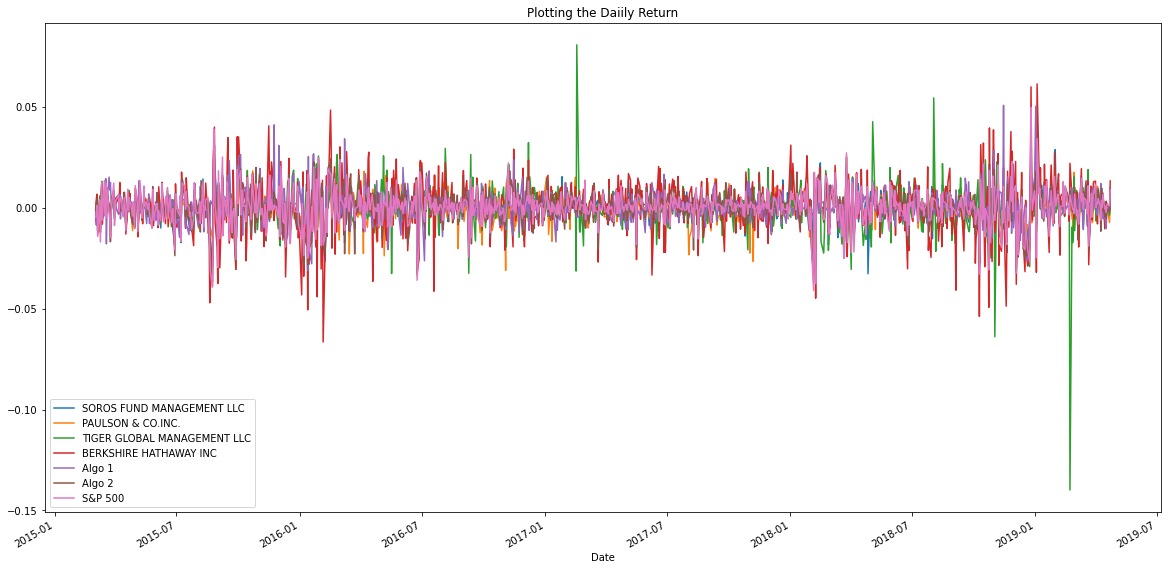

In [146]:
#Plotting the Daily Returns
returns_df.plot(figsize=(20,10),title="Plotting the Daiily Return")

## PLOTTING CUMULATIVE RETURNS OF PORTFOLIOS

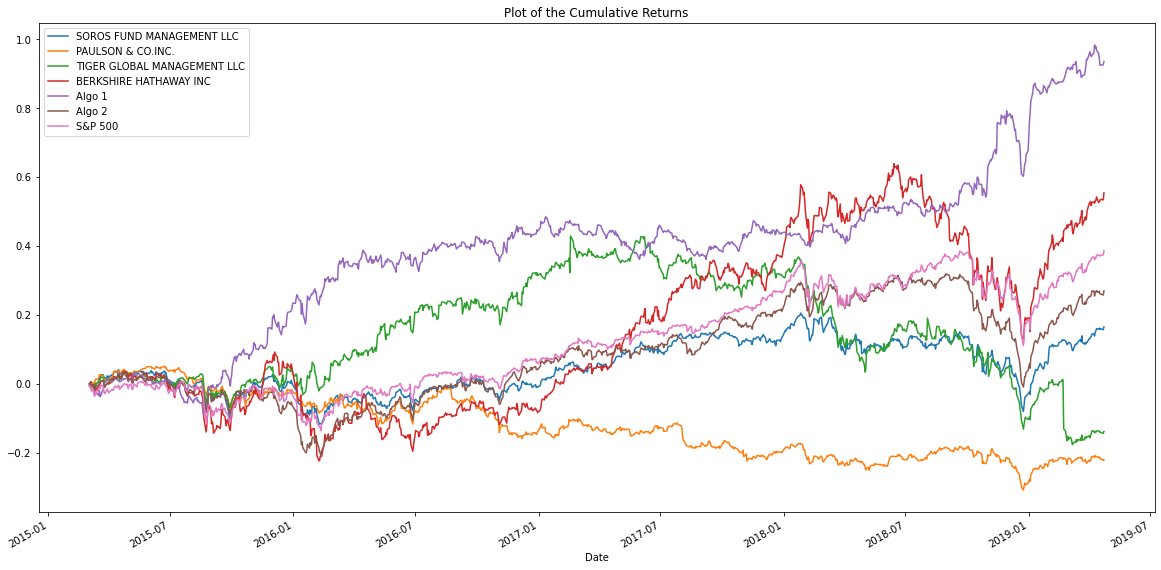

In [147]:
#Making the cumulative returns
cumulative_returns_df = (1 + returns_df).cumprod()-1
cumulative_returns_df.plot(figsize=(20,10),title="Plot of the Cumulative Returns")


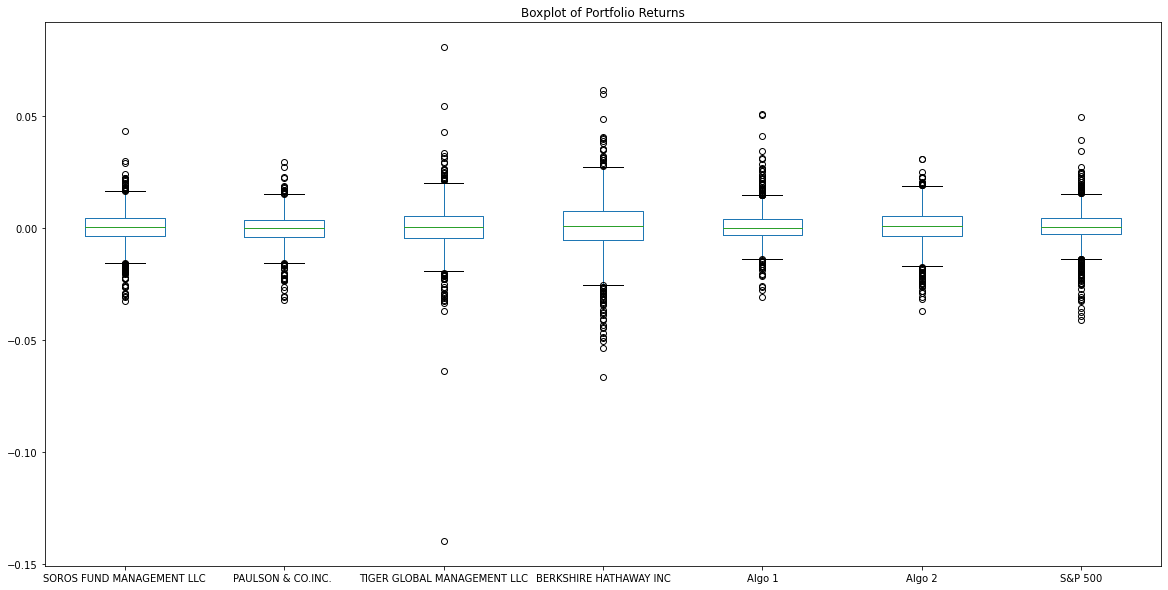

In [148]:
#Risk Computations
#Plotting the returns of the each portfolio
returns_df.plot(kind="box",figsize=(20,10),title="Boxplot of Portfolio Returns")

In [149]:
#Computing the Standard Deviation of Each Portfolio
print("-----------------------------------------")
print("(Standard Deviation of Each Portfolio)")
print("-----------------------------------------")
returns_df.std()

-----------------------------------------
(Standard Deviation of Each Portfolio)
-----------------------------------------


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [150]:
#Determining the Portfolios That are Riskier than the S&P500
print("-------------------------------------------------")
print("(Identifying Portfolios Riskier than the S&P500)")
print("-------------------------------------------------")
returns_df.std()>returns_df.std()['S&P 500']

-------------------------------------------------
(Identifying Portfolios Riskier than the S&P500)
-------------------------------------------------


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [151]:
#Computing Annualized Standard Deviation
print("-------------------------------------------------")
print("(Computing Annualized Standard Deviation)")
print("-------------------------------------------------")
volatility = returns_df.std() * np.sqrt(252)
volatility

-------------------------------------------------
(Computing Annualized Standard Deviation)
-------------------------------------------------


SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

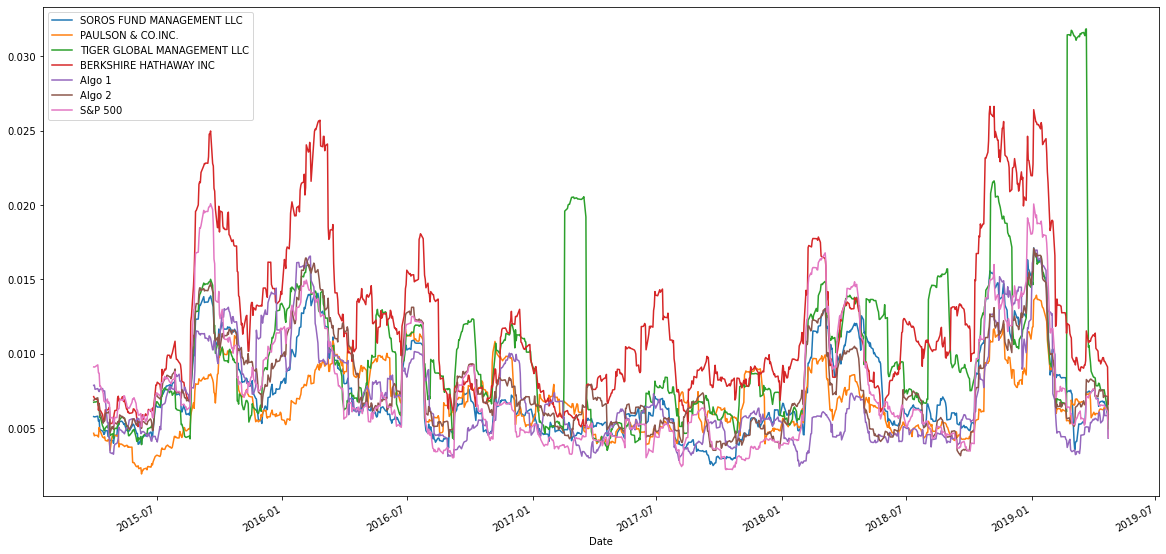

In [152]:
#Computation of Rolling Statistics
returns_df.rolling(window=21).std().plot(figsize=(20,10))


In [153]:
#Making the Correlation Table for the Data
returns_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


## PLOTTING ROLLING BETAS FOR INITIAL PORTFOLIOS

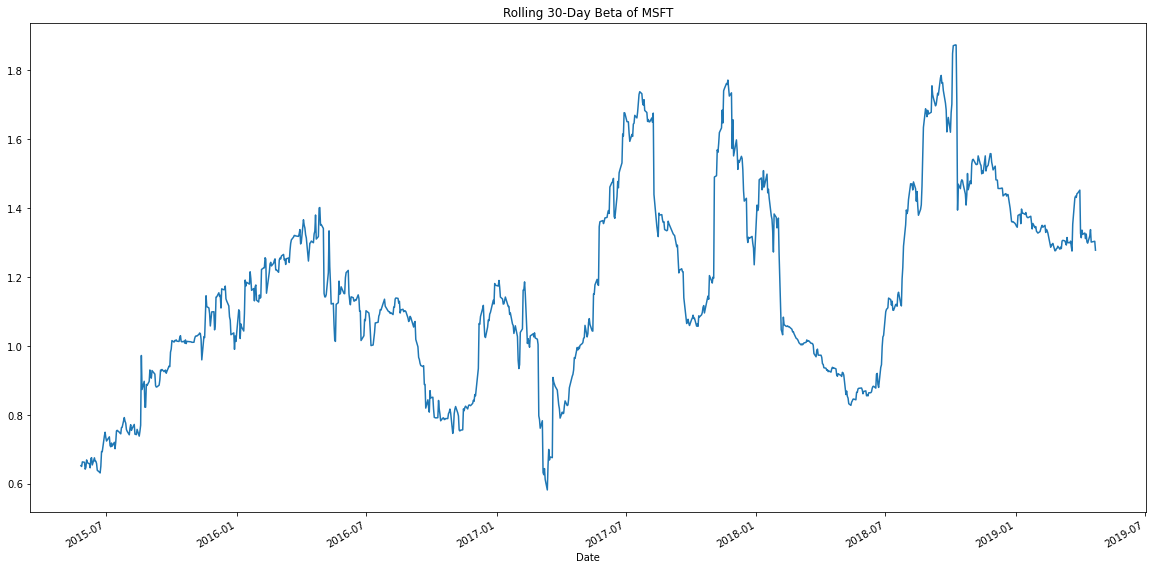

In [154]:
#Computing the Beta
rolling_covariance = returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(returns_df['S&P 500'])
rolling_variance = returns_df['S&P 500'].rolling(window=60).var()

# Calculate 30-day rolling beta of Algo 1 and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title='Rolling 30-Day Beta of MSFT')

In [140]:
#Computing Exponentially Weighted Moving Average
#cumulative_returns_df.ewm(span=30).mean().plot()
#returns_df.ewm(span=60).mean().plot(figsize=(20,10))
#returns_df.ewm(span=30).mean().plot()
#returns_df.rolling(30,win_type='exponential').mean().plot()

## COMPUTING THE SHARPE RATIOS FOR INITIAL PORTFOLIOS

In [155]:
#Computing Sharp Ratios
sharpe_ratios = (returns_df.mean() * 252) / (returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

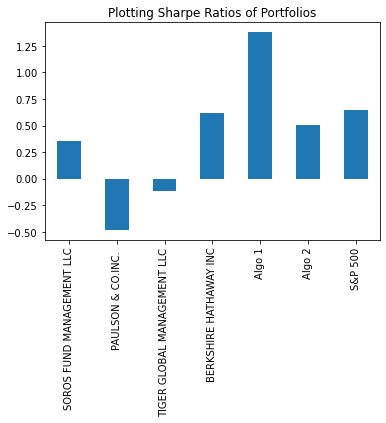

In [156]:
#Plotting the Sharp Ratio
sharpe_ratios.plot(kind='bar',title="Plotting Sharpe Ratios of Portfolios")

### Based on the results of the plots, we that Algo 1 outperformed the S&P 500 market, as well as the whales.

In [158]:
# Loading in my own data and constructing the data frame
NFLX=Path("NFLX_data2.csv")
AMZN=Path("AMZN_data2.csv")
FDX=Path("FDX_data2.csv")

NFLX_df=pd.read_csv(NFLX,index_col="Date",parse_dates=True,infer_datetime_format=False)
AMZN_df=pd.read_csv(AMZN,index_col="Date",parse_dates=True,infer_datetime_format=False)
FDX_df=pd.read_csv(FDX,index_col="Date",parse_dates=True,infer_datetime_format=False)


NFLX_df.sort_index(ascending=True,inplace=True)
AMZN_df.sort_index(ascending=True,inplace=True)
FDX_df.sort_index(ascending=True,inplace=True)

my_stocks_df=pd.concat([NFLX_df,AMZN_df,FDX_df],axis="columns",join="inner")
my_stocks_df.columns=['NFLX','AMZN','FDX']
my_stocks_df

#Construct dataframe of returns
my_returns_df=my_stocks_df.pct_change()
my_returns_df=my_returns_df.dropna() #dropping na columns

#Creating weights for my portfolio
weights=[0.25,.50,0.25]
portfolio_returns_df=my_returns_df.dot(weights)
portfolio_returns_df=pd.DataFrame(data=portfolio_returns_df)
portfolio_returns_df.columns=['Custom']
portfolio_returns_df

,Custom
Date,
2018-01-03,0.014461
2018-01-04,0.006837
2018-01-05,0.014364
2018-01-08,0.012241
2018-01-09,-0.001739
...,...
2018-12-24,-0.033236
2018-12-26,0.080577
2018-12-27,0.000083


## ADDING MY CUSTOM PORTFOLIO TO THE LIST OF PORTFOLIOS

In [159]:

returns_df2=pd.concat([returns_df,portfolio_returns_df],axis='columns',join='inner')
returns_df2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.006399,0.014461
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.004029,0.006837
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,0.007034,0.014364
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,0.001662,0.012241
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.001303,-0.001739
...,...,...,...,...,...,...,...,...
2018-12-24,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.027112,-0.033236
2018-12-26,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822,0.049594,0.080577
2018-12-27,0.004184,-0.007472,0.009149,0.004813,0.001571,0.000494,0.008563,0.000083


In [160]:
#Measuring The Risk (Finding Standard Deviations of Stocks)
returns_df2.std()
returns_df.set_index()

SOROS FUND MANAGEMENT LLC      0.009939
PAULSON & CO.INC.              0.007434
TIGER GLOBAL MANAGEMENT LLC    0.012507
BERKSHIRE HATHAWAY INC         0.015165
Algo 1                         0.007563
Algo 2                         0.009004
S&P 500                        0.010750
Custom                         0.020065
dtype: float64

## PLOTTING 21-DAY ROLLING STANDARD DEVIATIONS FOR ALL PORTFOLIOS

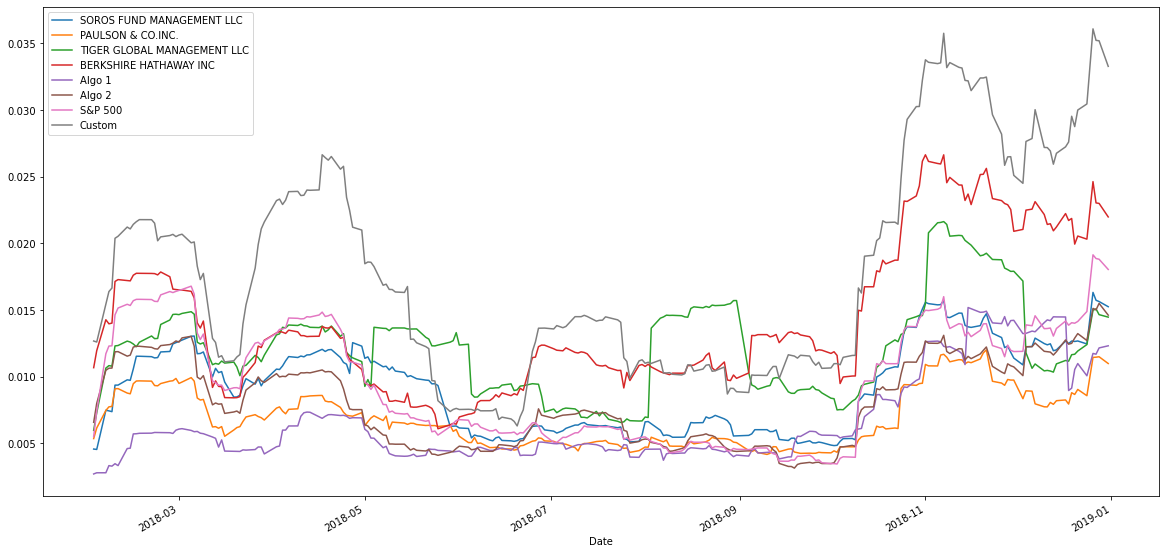

In [161]:
#21-Day Rolling Standard Deviation
returns_df2.rolling(window=21).std().plot(figsize=(20,10))

## PRINTING ANNUALIZED SHARPE RATIOS

In [162]:
#Annualized Sharpe Ratios
sharpe_ratios2 = (returns_df2.mean() * 252) / (returns_df.std() * np.sqrt(252))
sharpe_ratios2

Algo 1                         1.327457
Algo 2                        -1.213068
BERKSHIRE HATHAWAY INC        -0.682339
Custom                              NaN
PAULSON & CO.INC.             -1.139349
S&P 500                       -0.432223
SOROS FUND MANAGEMENT LLC     -1.260974
TIGER GLOBAL MANAGEMENT LLC   -2.085416
dtype: float64

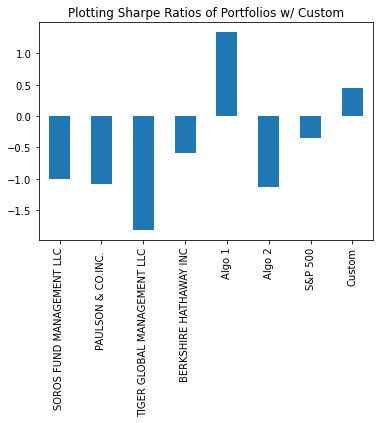

In [100]:
#Plotting the Sharpe Ratios
sharpe_ratios2.plot(kind='bar',title="Plotting Sharpe Ratios of Portfolios w/ Custom")

### Bar plot shows custom portiolio outperformed nearly all portfolios. The only portfolio that outperformed the custom portfolio was the Algo 1 portfoilo.

## SHOWING CORRELATION PLOT WITH CUSTOM PORTFOLIO

In [163]:
#Making the Correlation Table with Custom Portfolio
returns_df2.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.785223,0.615549,0.802833,0.381654,0.846903,0.858390,0.770190
PAULSON & CO.INC.,0.785223,1.000000,0.663716,0.678808,0.360494,0.817367,0.816676,0.689413
TIGER GLOBAL MANAGEMENT LLC,0.615549,0.663716,1.000000,0.501406,0.186736,0.619016,0.702874,0.517391
BERKSHIRE HATHAWAY INC,0.802833,0.678808,0.501406,1.000000,0.374323,0.800103,0.837869,0.862196
Algo 1,0.381654,0.360494,0.186736,0.374323,1.000000,0.362932,0.324546,0.361774
Algo 2,0.846903,0.817367,0.619016,0.800103,0.362932,1.000000,0.895958,0.780614
S&P 500,0.858390,0.816676,0.702874,0.837869,0.324546,0.895958,1.000000,0.839095
Custom,0.770190,0.689413,0.517391,0.862196,0.361774,0.780614,0.839095,1.000000


## MAKING ROLLING BETA FOR MY CUSTOM PORTFOLIO

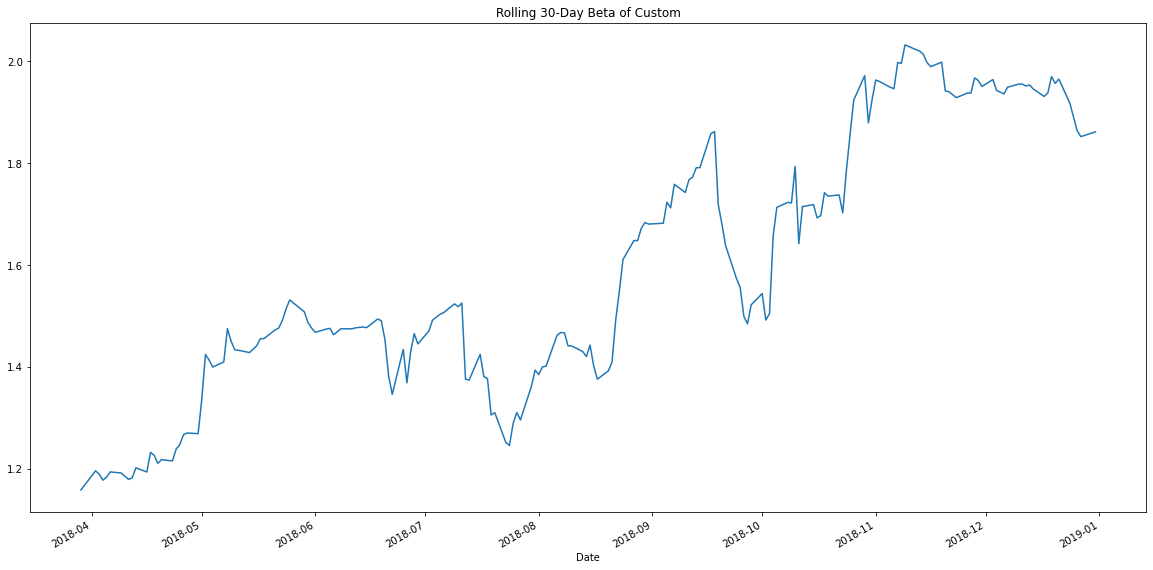

In [165]:
#Computing the Beta
rolling_covariance2 = returns_df2['Custom'].rolling(window=60).cov(returns_df['S&P 500'])
rolling_variance2 = returns_df2['S&P 500'].rolling(window=60).var()


# Calculate 30-day rolling beta of Algo 1 and plot the data
rolling_beta2 = rolling_covariance2 / rolling_variance2
rolling_beta2.plot(figsize=(20,10), title='Rolling 30-Day Beta of Custom')